<a href="https://colab.research.google.com/github/fathulmaulidan/dataminingb2/blob/main/checkpoint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentasi Pelanggan Menggunakan Metode Unsupervised Learning pada Data Penjualan Tiket pesawat**

## Business Understanding


####Tujuan Bisnis
tujuan bisnis dari dataset ini adalah pihak maskapai dapat dengan mudah menentukan sebuah harga penerbangan pesawat berdasarkan kemampuan pesawat yang tertera pada dataset, selain itu pihak maskapai dapat mengetahui kelebihan serta kekurangan dari sebuah pesawat tersebut


####Situasi Bisnis
Msituasi bisnis yang mendasari analisis ini adalah kebingungan pihak maskapai dalam menentukan sebuah harga tiket pesawat karena tidak mengetahui kelebihan dan kekurangan dari setiap pesawat yang ada


####Tujuan Data Mining
tujuan dari data mining dataset ini adalah pihak maskapai bisa memprediksi harga tiket pesawat berdasarkan kelebihan dan kekurangan yang dimiliki sebuah pesawat, serta dapat mengetahui profil lengkap pesawat terbang tesebut


####Rencana Proyek

rencana dari proyek ini ialah menganalisis segala faktor yang berkaitan dengan profil pesawat berdasarkan dataset yang ada. selanjutnya, dapat menjelaskan dengan rinci kelebihan dan kekurangan dari sebuah pesawat yang akan menjadi faktor dari menentukan harga dari sebuah pesawat. serta mengeksplosrasi dan mencari ketersinmbungan dari setiap data dan variabel yangg tersedia pada dataset


##Data Understanding

####Collect Initial Data
Dataset yang digunakan pada proyek ini adalah dataset "Plane Price" yang diunduh dari situs Kaggle.

Link Dataset : https://www.kaggle.com/datasets/rafsunahmad/plane-price-prediction



####Describe Data
Dilakukan perhitungan statistika deskriptif (mean, median, modus, standar deviasi) untuk setiap kolom tertentu yang memiliki nilai numerik

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Plane Price.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

Penjelasan Kolom:

1. model name    : nama dari model pesawat, bertipe objek
2. engine type   : mipe dari mesin pesawat, bertipe objek
3. HP or lbs thr ea engine : Dua unit rasio daya terhadap berat, bertipe objek
4. Max speed Knots : maksimal kecepatan dari pesawat, bertipe objek
5. Rcmnd cruise Knots : kecepatan standar dari pesawat, bertipe float
6. Stall Knots dirty  : kemacetan pesawat dalam kelajuan, bertipe float
7.  Fuel gal/lbs   : jumlah bahan bakar yang dibutuhkan pesawat, bertipe integer           
8.  All eng rate of climb : kecepatan pesawat dalam posisi vertikal, bertipe objek
9.  Eng out rate of climb : kemampuan mesin dalam lepas landas, bertipe float
10.  Takeoff over 50ft : terbang diatas ketinggian 50ft, bertipe float
11. Landing over 50ft : mendarat diatas ketinggian 50ft, bertipe objek
12. Empty weight lbs : berat pesawat tanpa muatan apapun, bertipe objek
13. Length ft/in : panjang pesawat, bertipe objek
14. Wing span ft/in : panjang sayap pesawat, bertipe objek
15. Range N.M. : jarak tempuh pesawat, bertipe objek
16. Price  : harga satuan pesawat, bertipe float


In [42]:
df[['Rcmnd cruise Knots','Stall Knots dirty','Fuel gal/lbs','Eng out rate of climb','Takeoff over 50ft','Price']].describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


Berdasarkan hasil di atas dapat diketahui jumlah, rata - rata, standar deviasi, nilai minimum maksimum pada beberapa kolom numerik yang telah ditentukan sebelumnya

In [5]:
df.sample(5)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
230,182 N Skylane,Piston,210,202,196.0,57.0,93,"1,250",1490.0,1500.0,"4,300","2,785",29/1,38/0,920,3100000.0
130,24 D (1973 thru 1975),Piston,225,170,161.0,52.0,50,"1,010",1235.0,1282.0,"2,900","1,730",25/5,32/8,550,1980000.0
477,100 Darter (S.L. Industries),Propjet,705,283,261.0,73.0,366,"2,590",1890.0,1670.0,"10,800","6,700",39/5,39/2,"1,100",2700000.0
446,PA-28-151 Warrior (prior '77 stall=58),Piston,200,NaN,130.0,39.0,40,"1,200",875.0,900.0,"2,600","1,535",24/11,38/0,455,1470000.0
296,Falcon 900 (3-eng fan jet),Piston,300,155,147.0,51.0,65,"1,040",1330.0,1400.0,"3,350","1,565",25/6,36/2,470,1750000.0


Output di atas merupakan tampilan dataframe dalam bentuk tabel dan hanya 5 indeks saja yang ditampilkan, sebab menggunakan metode 'head()'

In [6]:
import seaborn as sns
import plotly.express as plt
import matplotlib.pyplot as plt

3 baris di atas merupakan library - library yang digunakan untuk visualisasi pada kolom dalam dataframe, ke depannya library ini juga akan digunakan untuk visualisasi pada **Data Preparation** dan **Evaluation**

Text(0.5, 1.0, 'Distribusi Quarter Pada Dataset Cinema Ticket')

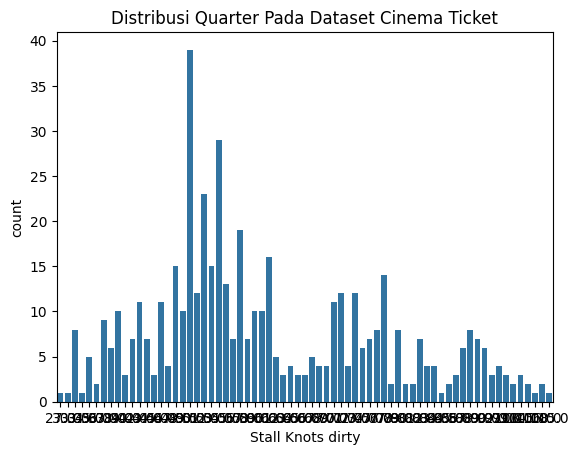

In [10]:
plot = sns.countplot(x='Stall Knots dirty',data=df)
plot.set_title('Distribusi Quarter Pada Dataset Cinema Ticket')

####Verifikasi Data
Dilakukan pengecekan kualitas data untuk memastikan bahwa data yang digunakan dalam proses pemodelan sudah teruji dan valid, sehingga menghasilkan pemodelan yang berkualitas.



In [11]:
df.isna().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

Output di atas menyatakan bahwa terletak nilai yang kosong pada kolom ***max speed Knots***, ***Rcmnd cruise Knots***, ***Stall Knots dirty***,***All eng rate of climb ***, ***Eng out rate of climb***, ***Takeoff over 50ft*** ***Empty weight lbs***, ***Range N.M.***,dan ***Price***

In [12]:
df[df.duplicated()]

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price


In [13]:
cols = ['Rcmnd cruise Knots','Stall Knots dirty','Fuel gal/lbs','Eng out rate of climb','Takeoff over 50ft','Price']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rcmnd cruise Knots,11.411992
Stall Knots dirty,0.580271
Fuel gal/lbs,15.473888
Eng out rate of climb,9.284333
Takeoff over 50ft,1.740812
Price,1.740812


Tabel di atas menunjukkan persentase outliers pada kolom tertentu.

In [15]:
import plotly.express as px

df_corr = df[['Rcmnd cruise Knots','Stall Knots dirty','Fuel gal/lbs','Eng out rate of climb','Takeoff over 50ft','Price']].corr(numeric_only=True)
px.imshow(df_corr)

Visualisasi di atas menunjukkan korelasi antara kolom tertentu dalam dataframe. Terlihat bahwa terdapat korelasi yang kuat antara kolom 'Rcmnd cruise Knots' dengan kolom 'Price' yang bernilai 0,945.

##Data Preparation

In [16]:
df_select = df.sample(frac=0.05, random_state=42)
df_select

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
304,Falcon Fan Jet 10,Piston,230,143,140.0,46.0,88,924,1625.0,1280.0,"3,110","1,882",28/0,16/0,813,1810000.0
501,100 Darter (S.L. Industries),Piston,150,149,143.0,50.0,35,900,1150.0,1100.0,"2,450","1,415",23/1,35/0,655,1720000.0
441,100 Darter (S.L. Industries),Piston,180,122,114.0,39.0,40,800,1275.0,900.0,"2,400","1,555",24/11,38/0,296,1300000.0
153,"402,-A turbocharged",Jet,"3,700",457,NaN,NaN,6707,"4,380",4540.0,3109.0,"19,500","12,130",55/1,43/9,"1,715",5100000.0
503,100 Darter (S.L. Industries),Piston,90,103,96.0,40.0,24,835,953.0,1016.0,"1,450",950,20/8,30/0,484,1250000.0
131,100 Darter (S.L. Industries),Piston,200,145,137.0,60.0,57,927,1561.0,1462.0,"2,750","1,696",25/9,32/9,647,1538500.0
204,100 Darter (S.L. Industries),Piston,300,229,210.0,70.0,102,"1,610",2220.0,1765.0,"6,300","4,038",36/1,39/11,"1,180",2618000.0
512,500 A,Propjet,1000,351,334.0,NaN,3819,"3,242",1930.0,2280.0,"12,050","7,856",43/5,47/8,"1,879",4100000.0
325,"Queen Air '8800' conv. Beech A80,B80",Piston,150,125,117.0,46.0,49,670,1575.0,1135.0,"2,350","1,415",27/0,35/7,591,1270000.0
247,100 Darter (S.L. Industries),Piston,285,205,187.0,57.0,90,930,2030.0,1500.0,"3,800","2,180",28/3,36/9,732,2850000.0


####Cleaning Data
Meliputi proses penghapusan data kosong, penghapusan outliers berdasarkan syarat tertentu, dan penghapusan data yang terduplikat agar proses analisis yang dilakukan dapat memberikan hasil yang optimal

In [17]:
df_select.isna().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            1
Rcmnd cruise Knots         2
Stall Knots dirty          2
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      1
Takeoff over 50ft          1
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

Output tersebut menunjukkan bahwa terdapat total 7 baris kosong pada dataset

In [19]:

df_select['Rcmnd cruise Knots'].fillna(df_select['Rcmnd cruise Knots'].mean(), inplace=True)
df_select['Stall Knots dirty'].fillna(df_select['Stall Knots dirty'].mean(), inplace=True)
df_select['Eng out rate of climb'].fillna(df_select['Eng out rate of climb'].mean(), inplace=True)
df_select['Takeoff over 50ft'].fillna(df_select['Takeoff over 50ft'].mean(), inplace=True)

In [20]:
df_select.isna().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            1
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

Output di atas sudah menunjukkan bahwa setiap kolom pada dataframe tidak memiliki nilai yang kosong kecuali kolom ***Max speed Knots*** karena bukan kolom numerik

In [21]:
df_select[df_select.duplicated()]

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price


Berdasarkan output di atas, dapat dilihat bahwa tidak ada baris duplikat di dalam dataframe yang digunakan.

In [22]:
cols = ['Rcmnd cruise Knots','Stall Knots dirty','Fuel gal/lbs','Eng out rate of climb','Takeoff over 50ft','Price']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_select[col].quantile(0.25)
    q3 = df_select[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_select[(df_select[col] < lower_bound) | (df_select[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_select))*100
    if percent_outliers < 10:
      df_select = df_select[~((df_select[col] > upper_bound) | (df_select[col] < lower_bound))]
    outliers_after = df_select[(df_select[col] < lower_bound) | (df_select[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df_select))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rcmnd cruise Knots,0.0
Stall Knots dirty,0.0
Fuel gal/lbs,12.0
Eng out rate of climb,0.0
Takeoff over 50ft,0.0
Price,0.0


In [23]:
df_select

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
304,Falcon Fan Jet 10,Piston,230,143,140.000000,46.000000,88,924,1625.00,1280.00,"3,110","1,882",28/0,16/0,813,1810000.0
501,100 Darter (S.L. Industries),Piston,150,149,143.000000,50.000000,35,900,1150.00,1100.00,"2,450","1,415",23/1,35/0,655,1720000.0
441,100 Darter (S.L. Industries),Piston,180,122,114.000000,39.000000,40,800,1275.00,900.00,"2,400","1,555",24/11,38/0,296,1300000.0
503,100 Darter (S.L. Industries),Piston,90,103,96.000000,40.000000,24,835,953.00,1016.00,"1,450",950,20/8,30/0,484,1250000.0
131,100 Darter (S.L. Industries),Piston,200,145,137.000000,60.000000,57,927,1561.00,1462.00,"2,750","1,696",25/9,32/9,647,1538500.0
204,100 Darter (S.L. Industries),Piston,300,229,210.000000,70.000000,102,"1,610",2220.00,1765.00,"6,300","4,038",36/1,39/11,"1,180",2618000.0
512,500 A,Propjet,1000,351,334.000000,58.166667,3819,"3,242",1930.00,2280.00,"12,050","7,856",43/5,47/8,"1,879",4100000.0
325,"Queen Air '8800' conv. Beech A80,B80",Piston,150,125,117.000000,46.000000,49,670,1575.00,1135.00,"2,350","1,415",27/0,35/7,591,1270000.0
247,100 Darter (S.L. Industries),Piston,285,205,187.000000,57.000000,90,930,2030.00,1500.00,"3,800","2,180",28/3,36/9,732,2850000.0
507,560 F,Piston,260,160,156.000000,51.000000,108,"1,150",980.00,980.00,"3,315","1,925",27/5,34/5,"1,043",2050000.0


####Reduction Data
Dilakukan untuk menghilangkan atau menghapus kolom yang tidak keberadaannya tidak terlalu berpengaruh dan memiliki kemungkinkan menghambat analisis yang akan dilakukan

In [24]:
df_reduct = df_select.drop(['Model Name','Engine Type','Empty weight lbs','HP or lbs thr ea engine','Length ft/in','Wing span ft/in', 'Range N.M.'],axis=1)
df_reduct

,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Price
304,143,140.000000,46.000000,88,924,1625.00,1280.00,"3,110",1810000.0
501,149,143.000000,50.000000,35,900,1150.00,1100.00,"2,450",1720000.0
441,122,114.000000,39.000000,40,800,1275.00,900.00,"2,400",1300000.0
503,103,96.000000,40.000000,24,835,953.00,1016.00,"1,450",1250000.0
131,145,137.000000,60.000000,57,927,1561.00,1462.00,"2,750",1538500.0
204,229,210.000000,70.000000,102,"1,610",2220.00,1765.00,"6,300",2618000.0
512,351,334.000000,58.166667,3819,"3,242",1930.00,2280.00,"12,050",4100000.0
325,125,117.000000,46.000000,49,670,1575.00,1135.00,"2,350",1270000.0
247,205,187.000000,57.000000,90,930,2030.00,1500.00,"3,800",2850000.0
507,160,156.000000,51.000000,108,"1,150",980.00,980.00,"3,315",2050000.0


##Modelling

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

Baris di atas merupakan library - library yang akan digunakan dalam proses Pre-Processing hingga Modelling menggunakan algoritma K-Means Clustering

####Pre-processing
Pada analisis ini akan dilakukan encoding dan penskalaan, encoding adalah proses transformasi nilai pada dataframe menjadi numerik semua dan penskalaan adalah mentransformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

#####Encoding

In [29]:
train = pd.get_dummies(df_reduct)

######Scalling

In [30]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train)

####Modelling
Pada tahap ini, proses modelling akan di mulai dari menentukan nilai k yang mampu memberikan hasil clustering optimal pada data yang digunakan lalu melakuka clustering terhadap data sesuai dengan nilai k yang terbaik

#####Select Optimal K Value
Elbow method adalah salah satu metode yang digunakan untuk menentukan jumlah kluster (k) yang optimal pada algoritma K-means dalam analisis data segmentasi pelanggan pada penjualan tiket bioskop.

Metode elbow memplotkan jumlah kluster yang berbeda pada sumbu-x dengan nilai fungsi objektif (SSE) pada sumbu-y. SSE merupakan jumlah kuadrat jarak antara setiap titik data dan pusat kluster terdekat pada kluster yang sesuai.

Grafik hasil plot SSE vs k kemudian dilihat apakah terdapat titik pada grafik yang menyerupai siku-siku. Titik ini disebut dengan elbow point.

Elbow point menunjukkan nilai k optimal di mana penambahan kluster tidak memberikan peningkatan yang signifikan pada SSE. Nilai k yang optimal ini kemudian dapat digunakan pada algoritma K-means untuk melakukan segmentasi pelanggan pada data penjualan tiket bioskop.

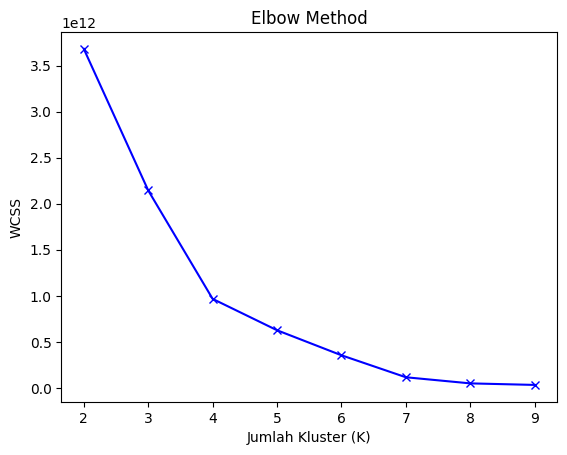

In [31]:
import warnings
warnings.filterwarnings("ignore")
elbow_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train)
    elbow_scores.append(kmeans.inertia_)

plt.plot(k_range, elbow_scores,"bx-")
plt.xlabel('Jumlah Kluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Setelah melakukan analisis dengan menggunakan metode elbow pada grafik hasil plot SSE vs k, ditemukan bahwa nilai k yang optimal untuk analisis segmentasi pelanggan pada data penjualan tiket pesawat adalah 4. Hal ini dikarenakan pada grafik terlihat bahwa setelah angka 4, tidak terdapat penurunan yang signifikan pada distorsi yang semakin mengecil. Oleh karena itu, nilai k yang optimal untuk analisis ini adalah 4.

#####Calculating KMeans
Dalam pengembangan algoritma K-means untuk analisis segmentasi pelanggan pada data penjualan tiket pesawat, akan dibuat sebuah class yang bernama Kmeans. Class tersebut akan berisi fungsi-fungsi untuk menentukan kluster mana sebuah baris data akan ditempatkan dan untuk menentukan pusat kluster secara acak.

In [32]:
class Kmeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):

            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()

                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [33]:
number_of_clusters = 4
kmeans = Kmeans(n_clusters=number_of_clusters)
kmeans.train(df=train, verbose=False)

Untuk menjalankan class Kmeans, perlu dilakukan inisiasi objek terlebih dahulu dengan menentukan jumlah kluster yang diinginkan (nilai kluster sudah ditentukan sebelumnya saat penggunaan elbow method). Setelah itu, dilakukan training pada data train untuk melatih model algoritma K-Means.

In [34]:
# Extract the results
train['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([train, centroids])

Bagian ini akan digunakan untuk mengekstrak hasil kluster yang telah dilakukan sebelumnya, lalu menyimpannya dalam sebuah variabel baru bernama **all_df**

In [35]:
cluster1 = train[train['cluster'] == 0]
cluster2 = train[train['cluster'] == 1]
cluster3 = train[train['cluster'] == 2]
cluster4 = train[train['cluster'] == 3]

Baris tersebut merupakan baris untuk menampung setiap baris data ke dalam kluster yang sesuai, dan baris hasil kluster tersebut akan disimpan dalam sebuah variabel.

In [36]:
cluster1.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,Max speed Knots_103,Max speed Knots_106,Max speed Knots_122,Max speed Knots_125,...,"Landing over 50ft_3,850","Landing over 50ft_4,990","Landing over 50ft_5,700","Landing over 50ft_5,975","Landing over 50ft_5,990","Landing over 50ft_6,200","Landing over 50ft_6,300","Landing over 50ft_7,300","Landing over 50ft_7,450",cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.0,5.0,5.0,5.0,...,5.0,5.0,5.000000,5.0,5.0,5.0,5.0,5.000000,5.000000,5.0
mean,235.600000,66.033333,895.200000,1946.600000,1907.600000,3.186000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.200000,0.200000,0.0
std,61.573533,7.927098,1635.083392,417.843033,366.669197,5.153931e+05,0.0,0.0,0.0,0.0,...,0.0,0.0,0.447214,0.0,0.0,0.0,0.0,0.447214,0.447214,0.0
min,180.000000,57.000000,90.000000,1250.000000,1500.000000,2.850000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,187.000000,58.166667,174.000000,1930.000000,1625.000000,2.950000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
50%,236.000000,69.000000,180.000000,2030.000000,1840.000000,3.010000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
75%,241.000000,72.000000,213.000000,2200.000000,2280.000000,3.020000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
max,334.000000,74.000000,3819.000000,2323.000000,2293.000000,4.100000e+06,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0


tabel di atas merupakan statistika deskriptif pada cluster 1

In [38]:
cluster2.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,Max speed Knots_103,Max speed Knots_106,Max speed Knots_122,Max speed Knots_125,...,"Landing over 50ft_3,850","Landing over 50ft_4,990","Landing over 50ft_5,700","Landing over 50ft_5,975","Landing over 50ft_5,990","Landing over 50ft_6,200","Landing over 50ft_6,300","Landing over 50ft_7,300","Landing over 50ft_7,450",cluster
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.0,8.0,8.0,8.0,...,8.000000,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
mean,139.630208,51.375000,63.625000,1664.020000,1385.030000,1.654288e+06,0.0,0.0,0.0,0.0,...,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,27.362403,4.838462,21.380482,268.830106,182.747277,1.025579e+05,0.0,0.0,0.0,0.0,...,0.353553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,90.000000,46.000000,35.000000,1150.000000,1100.000000,1.538500e+06,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,132.750000,48.250000,46.500000,1571.500000,1265.000000,1.595000e+06,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,139.500000,50.500000,65.500000,1647.500000,1393.000000,1.600000e+06,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,150.250000,53.750000,81.750000,1804.790000,1517.500000,1.736450e+06,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,176.041667,60.000000,88.000000,2050.000000,1614.240000,1.810000e+06,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
cluster3.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,Max speed Knots_103,Max speed Knots_106,Max speed Knots_122,Max speed Knots_125,...,"Landing over 50ft_3,850","Landing over 50ft_4,990","Landing over 50ft_5,700","Landing over 50ft_5,975","Landing over 50ft_5,990","Landing over 50ft_6,200","Landing over 50ft_6,300","Landing over 50ft_7,300","Landing over 50ft_7,450",cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,101.400000,43.400000,35.200000,1421.600000,1078.200000,1.147000e+06,0.200000,0.200000,0.200000,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
std,15.646086,4.560702,10.329569,358.591411,135.789175,2.784241e+05,0.447214,0.447214,0.447214,0.447214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,78.000000,39.000000,24.000000,953.000000,900.000000,6.500000e+05,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25%,96.000000,40.000000,26.000000,1275.000000,1016.000000,1.250000e+06,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
50%,102.000000,42.000000,37.000000,1385.000000,1075.000000,1.265000e+06,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,114.000000,46.000000,40.000000,1575.000000,1135.000000,1.270000e+06,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
max,117.000000,50.000000,49.000000,1920.000000,1265.000000,1.300000e+06,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [40]:
cluster4.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price,Max speed Knots_103,Max speed Knots_106,Max speed Knots_122,Max speed Knots_125,...,"Landing over 50ft_3,850","Landing over 50ft_4,990","Landing over 50ft_5,700","Landing over 50ft_5,975","Landing over 50ft_5,990","Landing over 50ft_6,200","Landing over 50ft_6,300","Landing over 50ft_7,300","Landing over 50ft_7,450",cluster
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000e+00,6.0,6.0,6.0,6.0,...,6.0,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.0
mean,202.333333,69.000000,113.666667,2005.500000,1763.666667,2.438000e+06,0.0,0.0,0.0,0.0,...,0.0,0.166667,0.0,0.166667,0.166667,0.166667,0.166667,0.0,0.0,3.0
std,26.204325,9.273618,25.750081,661.243904,462.457205,2.775464e+05,0.0,0.0,0.0,0.0,...,0.0,0.408248,0.0,0.408248,0.408248,0.408248,0.408248,0.0,0.0,0.0
min,156.000000,51.000000,102.000000,980.000000,980.000000,2.050000e+06,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
25%,195.750000,70.250000,102.000000,1601.250000,1731.250000,2.222500e+06,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
50%,210.000000,71.000000,102.000000,2292.500000,1802.500000,2.559000e+06,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
75%,213.750000,72.500000,106.500000,2413.750000,1847.500000,2.642000e+06,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.0
max,232.000000,78.000000,166.000000,2643.000000,2427.000000,2.680000e+06,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,3.0


##Evaluation
Matriks evaluasi yang digunakan dalam penelitian ini adalah Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Silhouette score mengukur seberapa dekat setiap titik pada kluster tertentu dibandingkan dengan kluster lainnya. Semakin tinggi nilai silhouette score, semakin baik klaster tersebut. Calinski-Harabasz score mengukur rasio antara variansi yang dijelaskan oleh kluster dan variansi di antara kluster. Semakin tinggi nilai calinski-harabasz score, semakin baik algoritma clustering tersebut. Sedangkan Davies-Bouldin score mengukur jarak antara kluster dan meminimalkan jarak antar kluster, semakin rendah nilai Davies-Bouldin score, semakin baik algoritma clustering tersebut.

Kriteria untuk menilai algoritma clustering semakin baik atau tidak pada setiap matriks evaluasi adalah:

* Silhouette score: semakin dekat nilai silhouette score ke 1, semakin baik kualitas clustering. Nilai silhouette score yang dekat ke -1 menunjukkan cluster yang buruk.
* Calinski-Harabasz score: semakin tinggi nilai calinski-harabasz score, semakin baik kualitas clustering. Nilai yang rendah menunjukkan cluster yang tidak terpisah dengan baik.
* Davies-Bouldin score: semakin rendah nilai davies-bouldin score, semakin baik kualitas clustering. Nilai yang tinggi menunjukkan cluster yang saling tumpang tindih.

In [41]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
# Menghitung nilai Silhouette Score
silhouette_avg = silhouette_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Calinski-Harabasz Index
ch_score= calinski_harabasz_score(train.drop('cluster', axis=1), kmeans.clusters)

# Menghitung nilai Davies-Bouldin Index
db_score= davies_bouldin_score(train.drop('cluster', axis=1), kmeans.clusters)

# Create dataframe for metrics and scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores = [silhouette_avg, ch_score, db_score]
df_scores = pd.DataFrame({'Metric': metrics, 'Score': scores})

# reset index dataframe
df_scores = df_scores.reset_index(drop=True)

# ubah nama axis pada index dan kolom
df_scores = df_scores.rename_axis('', axis=0).rename_axis('Metrics', axis=1)

# Display dataframe as table without index column
display(df_scores.style.hide_index())


Metric,Score
Silhouette Score,0.511385
Calinski-Harabasz Score,46.161462
Davies-Bouldin Score,0.682380


####Save Data
Dataset yang telah diproses pada tahap **Modelling** akan disimpan, karena dataset pada proses itu terdapat tambahan kolom kluster yang memudahkan untuk dipresentasi dan divisualisasikan pada tahap lanjutan di luar dari analisis ini. Dataset disimpan dengan mengecualikan nilai index, agar proses penggunaannya lebih optimal

In [43]:
train.to_csv('Plane.csv',index=False)